In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('archive/heart.csv')

In [3]:
data_1=pd.read_csv('archive/o2Saturation.csv')

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB


In [10]:
data.select_dtypes(include='float64').columns

Index(['oldpeak'], dtype='object')

In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [13]:
data.shape

(303, 14)

In [14]:
import seaborn as sns

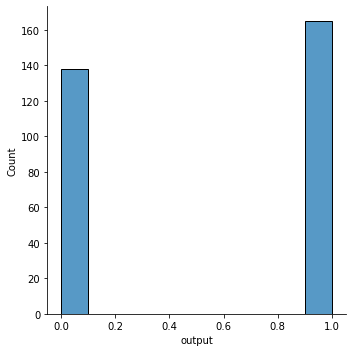

In [17]:
sns.displot(x='output',data=data)

In [18]:
import matplotlib.pyplot as plt

<AxesSubplot:>

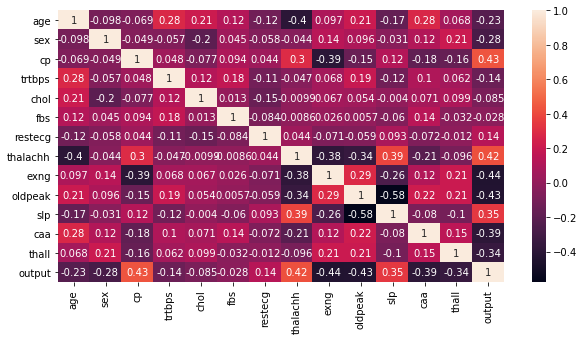

In [21]:
plt.figure(figsize=(10,5))
corr=data.corr()
sns.heatmap(corr,annot=True)

In [22]:
from sklearn.model_selection import train_test_split

In [30]:
X=data.drop('output',axis=1)
y=data['output']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression(solver='sag',penalty='l2',C=0.01)

In [61]:
model.fit(X_train,y_train)

C:\Users\magda\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.01, solver='sag')

In [62]:
y_pred=model.predict(X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        41
           1       0.78      0.78      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [66]:
print(confusion_matrix(y_test,y_pred))

[[30 11]
 [11 39]]


In [67]:
pip install eli5

  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.



  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107729 sha256=9b5bbc0fc9e7dd9e5ef1897e8c0267a3bd062cbdf5db20a8e16d8b78e18e579a
  Stored in directory: c:\users\magda\appdata\local\pip\cache\wheels\85\ac\25\ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
sphinx 4.0.1 requires Jinja2<3.0,>=2.3, but you have jinja2 3.1.2 which is incompatible.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.1.3 which is incompatible.


In [69]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


Weight,Feature
0.1143 ± 0.1064,thalachh
0.0220 ± 0.0440,trtbps
0.0110 ± 0.0461,chol
0.0066 ± 0.0264,oldpeak
0 ± 0.0000,thall
0 ± 0.0000,slp
0 ± 0.0000,exng
0 ± 0.0000,restecg
0 ± 0.0000,fbs
0 ± 0.0000,cp


In [73]:
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Create and plot the data
disp1 = PartialDependenceDisplay.from_estimator(model, X_test, ['output'])
plt.show()

AttributeError: type object 'PartialDependenceDisplay' has no attribute 'from_estimator'